In [ ]:
#132p
#27, 28, 29 번 문제

In [1]:
#27
class Fraction1():
    def __init__(self, numerator, denominator):
        self.numerator = numerator #분자
        self.denominator = denominator #분모
    
    def reduce(self):
        gcd = self.GCD(self.numerator,self.denominator) 
        return self.numerator // gcd, self.denominator // gcd  
        
    
    def GCD(self,m,n):
        while n !=0:
            t = n
            n = m % n
            m = t
        return m    


In [2]:
#28
numerator = int(input("Enter numerator of fraction : "))
denominator = int(input("Enter denominator of fraction : "))


fraction = Fraction1(numerator,denominator)
fraction.reduce()


TypeError: not all arguments converted during string formatting

In [ ]:
#29


In [11]:
#교수님
class Fraction():
    def __init__(self, numerator, denominator):
        self._numerator = numerator
        self._denominator = denominator
        
    @staticmethod
    def GCD(m,n):
        while n !=0:
            t = n
            n = m % n
            m = t
        return m    
        
    def reduce(self):
        if self._denominator == 0:
            raise ZeroDivisionError("0으로 나누지 말래도")
        gcd = self.GCD(self._numerator, self._denominator)
        return self._numerator // gcd, self._denominator // gcd #그냥 컴마로 하면 튜플이다

In [14]:
#from fraction import Fraction
#28

def main():
    numer = int(input("Enter numerator of fraction : "))    
    denom = int(input("Enter denominator of fraction : "))
    # denom = 0
    # while denom == 0:
    #     denom = int(input("Enter denominator of fraction : "))
    
    
    # if denom==0:
    #     print('0으로 나누고 있노')
    #     return        
    
    frac = Fraction(numer, denom)
    try:
        numer_reduced, denom_reduced = frac.reduce() #튜플로 리턴해줬으니
        #print(type(frac.reduce()))
        
        if denom_reduced ==1:
            print('Reduction: {}'.format(numer_reduced))
                        
        else:       
            print('Reduction: {}/{}'.format(numer_reduced, denom_reduced))
    except Exception as exp:
        print(exp)
main()

0으로 나누지 말래도


In [19]:
#29
def main():
    number =  input("Enter a positive decimal number less than 1 : ") #자리수를 알려면 str이 필요. float 쓰면 난관.
    #float로 하면 계속 10을 곱해줘야해. 0.xxxx 면 xxxx/10^4 이다. xxxx 자리수만 알면 되겠지?
    
    if number[0] == '0':
        precision = len(number[2:])
    elif number[0] == '.':
        precision = len(number[1:])
    else:
        print("Enter correct number plz")
        return

    numer = int(float(number) * 10**precision)
    denom = int(10**precision)
    
    frac = Fraction(numer, denom)
    try:
        numer_reduced, denom_reduced = frac.reduce() #튜플로 리턴해줬으니
        #print(type(frac.reduce()))
        
        if denom_reduced ==1:
            print('Reduction: {}'.format(numer_reduced))
                        
        else:       
            print('Reduction: {}/{}'.format(numer_reduced, denom_reduced))
    except Exception as exp:
        print(exp)
main()
    
    


Reduction: 3/8


# Adding New Instance Variables to a Subclass

In [ ]:
#102페이지

#부모에 a가 있고, child에 a도 있고 b도 있고싶을때 어떻게 하는가?
#생성자에서 고려해줘야겠지?
# super().__init__(parentPar1, . . . , parentParN)

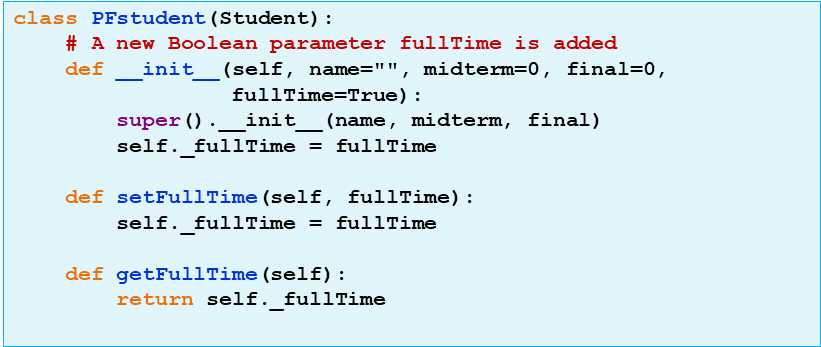
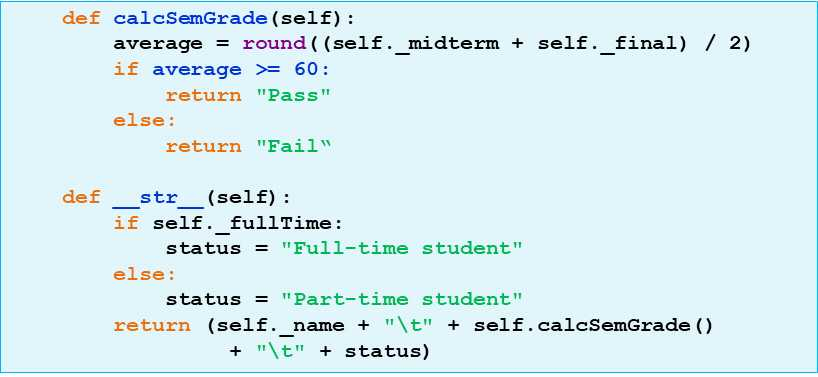

In [26]:
class Parent:
    def __init__(self):
        self._parent = "I am a parent"
        self._temp = 'temp parent'
        
class Child(Parent):
    def __init__(self):
        super().__init__() #super이 즉 Parent, Parent의 init를 실행. 반드시 첫줄에 넣어야 한다.
        self._child = 'I am a child'
        self._temp = 'temp child'
       # super().__init__() 여기에 넣으면 temp child가 안나오고 temp parent가 나온다.        

p = Parent()
c = Child()

print(p._parent)
print(c._child)
print(c._parent) #이렇게 하면 되겠지~? 했는데 없네? 상속했는데? 이걸 super로.

print(p._temp)
print(c._temp)
        

I am a parent
I am a child
I am a parent
temp parent
temp child


# 다중상속
106p 까지 쭉쭉

In [32]:
class A:
    def print():
        print('I am A')
class B:
    def print():
        print('I am B')
        
class C(A,B):
    pass

class D(B,A):
    pass

class E(B,A):
    def print():
        print('I am E')
        
class F:
    def print():
        print('I am F')
class G:
    def print():
        print('I am G')
        
class H(F,G):
    pass

class I(E):
    pass

class J(H,I):
    pass

#class K(C,D): #중복은 허용되나 부모의 교차는 허용안된다.
    pass
        

A.print()
B.print()
C.print()
D.print()
E.print() #자신에게서 가장 먼저 찾고, 그다음 부모 클래스 찾아가는데 순서대로.
#depth-first => 한쪽 깊어지는쪽 먼저 쭉 다 파고 그다음 다음거.
#왼쪽에서 오른쪽으로 상속 (A,B) (B,A) 이거 두개가 다르지?

print(E.__mro__) #메소드 찾아가는 순서가 나온다. 자기꺼 먼저, B, A, object까지
print(J.__mro__) #Method resolution order 

I am A
I am B
I am A
I am B
I am E
(<class '__main__.E'>, <class '__main__.B'>, <class '__main__.A'>, <class 'object'>)
(<class '__main__.J'>, <class '__main__.H'>, <class '__main__.F'>, <class '__main__.G'>, <class '__main__.I'>, <class '__main__.E'>, <class '__main__.B'>, <class '__main__.A'>, <class 'object'>)


In [ ]:
import random

class Contestant:
    def __init__(self, name):
        self.name = name
        self.score = 0

    def choose(self):
        pass

    def add_score(self):
        self.score += 1

class Human(Contestant):
    def choose(self):
        choice = input("가위, 바위, 보 중 하나를 선택하세요: ")
        while choice not in ["가위", "바위", "보"]:
            choice = input("가위, 바위, 보 중 하나를 선택하세요: ")
        return choice

class Computer(Contestant):
    def choose(self):
        choice = random.choice(["가위", "바위", "보"])
        return choice

def compare(human_choice, computer_choice):
    if human_choice == computer_choice:
        return 0  # 무승부
    elif (human_choice == "가위" and computer_choice == "보") or \
         (human_choice == "바위" and computer_choice == "가위") or \
         (human_choice == "보" and computer_choice == "바위"):
        return 1  # 사람 승
    else:
        return -1  # 컴퓨터 승

def play_game(human, computer):
    for _ in range(3):
        human_choice = human.choose()
        computer_choice = computer.choose()
        print(f"{human.name}의 선택: {human_choice}, {computer.name}의 선택: {computer_choice}")

        result = compare(human_choice, computer_choice)
        if result == 1:
            print(f"{human.name}이(가) 승리했습니다.")
            human.add_score()
        elif result == -1:
            print(f"{computer.name}이(가) 승리했습니다.")
            computer.add_score()
        else:
            print("무승부입니다.")
    
    if human.score > computer.score:
        print(f"{human.name}이(가) 최종 승리했습니다.")
    elif human.score < computer.score:
        print(f"{computer.name}이(가) 최종 승리했습니다.")
    else:
        print("최종 무승부입니다.")

human = Human("사용자")
computer = Computer("컴퓨터")
play_game(human, computer)


In [33]:
# 133p
import random


class Contestant:
    def __init__(self, name):
        self._name = name
        self._score = 0

    def choose(self):
        pass

    def plus_score(self):
        self._score += 1


class Human(Contestant):
    def choose(self):        
        choice = input(f"{human}, enter your choice :(rock, scissors, paper)")
        return choice


class Computer(Contestant):
    def choose(self):
        jkb = "rock", "sicssors", "paper"
        choice = random.choice(jkb)
        return choice


def compare(human_choice, computer_choice):
    if human_choice == computer_choice:
        return 0
    elif (human_choice == "rock" and computer_choice == "scissors") or \
        (human_choice == "scissors" and computer_choice == "paper") or \
            (human_choice == "paper" and computer_choice == "rock"):
        return 1
    else:
        return -1


def main():
    name_human = input("Enter name of human : ")
    name_computer = input("Enter name of computer : ")
    
    human = Human(name_human)
    computer = Computer(name_computer)
    
    human_choice = human.choose()
    computer_choice = computer.choose()
    
    
    result = compare(human_choice, computer_choice)
    
    
    
    if result == 1:       
        human_score = human.plus_score()
        print(f"{human._name} : {human_score} {computer._name} : {computer_score}")
    elif result == -1:
        computer_score = computer.plus_score()        
    else:
        print("무승부")
    

SyntaxError: incomplete input (451835349.py, line 3)

In [1]:
from abc import *
import random

class Contestent(metaclass = ABCMeta):
    def __init__(self, name=''):
        self._name = name
        self._score = 0
        self._selection = ('rock', 'scissors', 'paper')
        
    def getName(self):
        return self._name
    def getScore(self):
        return self._score   
    def addScore(self):
        self._score +=1
        
    @abstractmethod
    def choose(self):
        pass
    
class Computer(Contestent):
    def choose(self):
        selection = random.choice(self._selection)
        print(f"{self._name} chooses {selection}")
        return selection
    
    
class Human(Contestent):
    def choose(self):
        selection =''
        while selection not in self._selection:
            selection = input(f"{self._name}, enter your choice : ")
        return selection
    

def getGameResult(choice1, choice2):
    #if~ 경우의수 3가지
    #둘의 선택을 입력받아, 가위바위보 결과를 반환
    #이기면 1, 비기면 0, 지면 -1을 반환
    list_case = (('rock', 'scissors'),
                 ('scissors', 'paper'),
                 ('paper', 'rock'))
    if (choice1, choice2) in list_case:
        return 1
    elif choice1 == choice2:
        return 0
    else:
        return -1
        
def main():
    name_human = input("Enter name of human : ")
    name_computer = input("Enter name of computer : ")
    
    human = Human(name_human)
    computer = Computer(name_computer)
    
    for _ in range(3):
        choice1 = human.choose()
        choice2 = computer.choose()
        
        result = getGameResult(choice1, choice2)
        
        if result > 0:
            human.addScore()
        elif result <0:
            computer.addScore()
        print(f"{human.getName()} : {human.getScore()}, {computer.getName()} : {computer.getScore()}")
    if human.getScore() == computer.getScore():
        print('TIE')
    else:
        winner = human.getName() \
            if human.getScore() > computer.getScore() \
                else computer.getName()        
        print(f"{winner} WIN")
        
main()

alpha chooses scissors
jsg : 1, alpha : 0
alpha chooses rock
jsg : 1, alpha : 0
alpha chooses rock
jsg : 2, alpha : 0
jsg WIN


In [ ]:
import numpy as np

a = np.array([1,2,3])

b= np.array([[1,2], [3,4]])


In [5]:
import numpy as np

a = np.eye(3)
b = np.eye(3, 4)
c = np.linspace(10, 20, 5) #구간 5등분


print(a)
print(b)
print(c)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[10.  12.5 15.  17.5 20. ]


In [11]:
import numpy as np

a = np.arange(6)

a[0] = 10 

b = a.reshape(3,2) #a를 바꾸면 같이 바뀌네. 주소를 가리킨다

a = np.arange(24)

b = a.reshape(2,3,4)
print(b)

b[1][0][2] #괄호쌍 바깥에서부터 보면 된다.

np.amin(b, -1)
np.amin(b, 0)


             

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [14]:
a = np.array([[1,2], [3,4]])
b = a*10

a @ b #행렬곱

np.linalg

#ax = b 에서 a와 b를 알때 x를 모를때

#x = A^-1 B 이런거



<module 'numpy.linalg' from 'c:\\Users\\user\\AppData\\Local\\Programs\\Thonny\\lib\\site-packages\\numpy\\linalg\\__init__.py'>